In [42]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# PREDICTING NORTH AMERICAN VIDEO GAME SALES

## Table Of Contents
1. [Preprocessing the Data](#preprocess)
3. [Visualizing the Data](#visualize)
4. [Correlation of Features](#correlation)
5. [Training our NaiveBayes Model](#trainingModel0)

## Preprocessing <a name="preprocess"></a>

First we will be reading in the data which is in a csv file.

In [43]:
## base_vgs_df ==== Base Video Game Sales DataFrame

base_vgs_df = pd.read_csv('../VideoGameSalesProject2021/Video_Games_Sales_as_at_22_Dec_2016.csv')

base_vgs_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
## checking for missing values
base_vgs_df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [45]:
## create general platform column

base_vgs_df['General_Platform']= 6*np.ones(int(base_vgs_df['Platform'].size))

base_vgs_df.loc[base_vgs_df['Platform'] == 'PS3', 'General_Platform'] = 1 ## Sony_Playstation
base_vgs_df.loc[base_vgs_df['Platform'] == 'PS', 'General_Platform'] = 1 ## Sony_Playstation 
base_vgs_df.loc[base_vgs_df['Platform'] == 'PS2', 'General_Platform'] = 1 ## Sony_Playstation
base_vgs_df.loc[base_vgs_df['Platform'] == 'PS4', 'General_Platform'] = 1 ## Sony_Playstation
base_vgs_df.loc[base_vgs_df['Platform'] == 'PSP', 'General_Platform'] = 1 ## Sony_Playstation
base_vgs_df.loc[base_vgs_df['Platform'] == 'PSV', 'General_Platform'] = 1 ## Sony_Playstation
base_vgs_df.loc[base_vgs_df['Platform'] == 'Wii', 'General_Platform'] = 2 ## Nintendo
base_vgs_df.loc[base_vgs_df['Platform'] == 'DS', 'General_Platform'] = 2 ## Nintendo
base_vgs_df.loc[base_vgs_df['Platform'] == 'GBA', 'General_Platform'] = 2 ## Nintendo
base_vgs_df.loc[base_vgs_df['Platform'] == '3DS', 'General_Platform'] = 2 ## Nintendo
base_vgs_df.loc[base_vgs_df['Platform'] == 'WiiU', 'General_Platform'] = 2 ## Nintendo
base_vgs_df.loc[base_vgs_df['Platform'] == 'NES', 'General_Platform'] = 2 ## Nintendo
base_vgs_df.loc[base_vgs_df['Platform'] == 'SNES', 'General_Platform'] = 2 ## Nintendo
base_vgs_df.loc[base_vgs_df['Platform'] == 'N64', 'General_Platform'] = 2 ## Nintendo'
base_vgs_df.loc[base_vgs_df['Platform'] == 'GB', 'General_Platform'] = 2 ## Nintendo
base_vgs_df.loc[base_vgs_df['Platform'] == 'GC', 'General_Platform'] = 2 ## Nintendo
base_vgs_df.loc[base_vgs_df['Platform'] == 'X360', 'General_Platform'] = 3 ##Microsoft_Xbox
base_vgs_df.loc[base_vgs_df['Platform'] == 'XB', 'General_Platform'] = 3 ##Microsoft_Xbox
base_vgs_df.loc[base_vgs_df['Platform'] == 'XOne', 'General_Platform'] = 3 ##Microsoft_Xbox
base_vgs_df.loc[base_vgs_df['Platform'] == '2600', 'General_Platform'] = 6 ##'Atari'
base_vgs_df.loc[base_vgs_df['Platform'] == 'DC', 'General_Platform'] = 5 #Sega
base_vgs_df.loc[base_vgs_df['Platform'] == 'SAT', 'General_Platform'] = 5 #Sega
base_vgs_df.loc[base_vgs_df['Platform'] == 'GG', 'General_Platform'] = 5 #Sega
base_vgs_df.loc[base_vgs_df['Platform'] == 'WS', 'General_Platform'] = 6 #'Bandal'
base_vgs_df.loc[base_vgs_df['Platform'] == 'TG16', 'General_Platform'] = 6 #'Nec'
base_vgs_df.loc[base_vgs_df['Platform'] == 'PCFX', 'General_Platform'] = 6 #'Nec'
base_vgs_df.loc[base_vgs_df['Platform'] == '3DO', 'General_Platform'] = 6# 'Panasonic'
base_vgs_df.loc[base_vgs_df['Platform'] == 'PC', 'General_Platform'] = 4 ##PC

base_vgs_df["General_Platform"].unique()



array([2., 3., 1., 4., 6., 5.])

In [88]:
## std_vgs_df ==== Standard Video Game Sales DataFrame 
## removed following columns (Critic_Score, Critic_Count,User_Score,User_Count,Developer,Rating)
std_vgs_df = base_vgs_df.dropna(axis=1, thresh = 16000).dropna().reset_index(drop = True).astype({'Year_of_Release': 'int32'})

thisdict = {
   "Sports": 1,
    "Platform": 2,
    "Racing": 3,
    "Role-Playing": 4,
    'Puzzle' : 12,
    "Misc" : 5,
    "Shooter": 6, 
    "Simulation": 7, 
    "Action":8, 
    "Fighting":9, 
    "Adventure":10,
    "Strategy":11
}
#std_vgs_df.dtypes
temp = 0
for name in std_vgs_df.Genre:
    std_vgs_df.loc[temp, 'Genre'] = thisdict[name]
    temp = temp +1

#train_std, test_std = train_test_split(std_vgs_df, test_size=0.2)
#std_vgs_df.head()
std_vgs_df.Genre.unique()

array([1, 2, 3, 4, 12, 5, 6, 7, 8, 9, 10, 11], dtype=object)

In [75]:
## noNA_vgs_df ==== Video Game Sales DataFrame with ALL ROWS WITH NA VALUES REMOVED

noNA_vgs_df = base_vgs_df.dropna().reset_index(drop = True).astype({'Year_of_Release': 'int32'})
noNA_vgs_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,General_Platform
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,2.0
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,2.0
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,2.0
3,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,2.0
4,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,2.0


## Visualization <a name="visualize"></a>

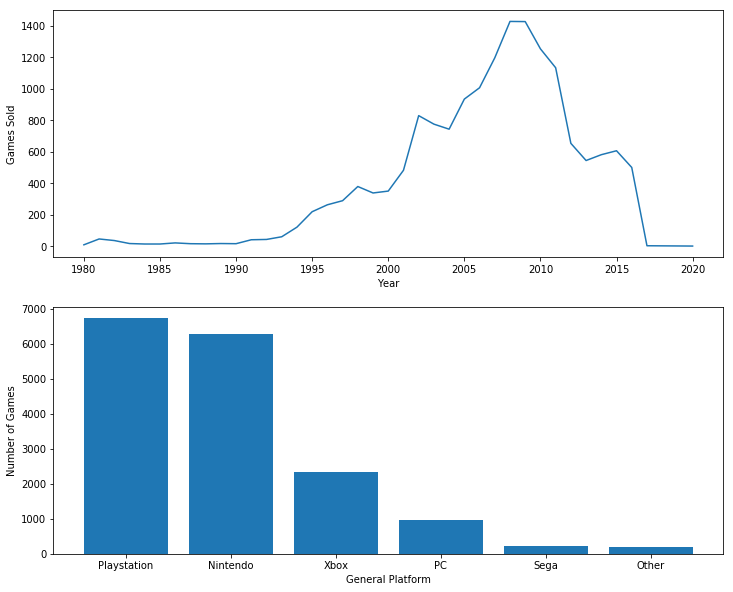

In [63]:
## check number of games for each platform

platform_nums = base_vgs_df.pivot_table(index=['General_Platform'], aggfunc='size')

games_per_year = std_vgs_df.pivot_table(index = ['Year_of_Release'], aggfunc = 'size')

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

axes[1].bar(x = np.array(['Playstation', 'Nintendo', 'Xbox', 'PC', 'Sega', 'Other']), height = platform_nums)
axes[0].plot(games_per_year)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Games Sold')
axes[1].set_xlabel('General Platform')
axes[1].set_ylabel('Number of Games')

plt.show()

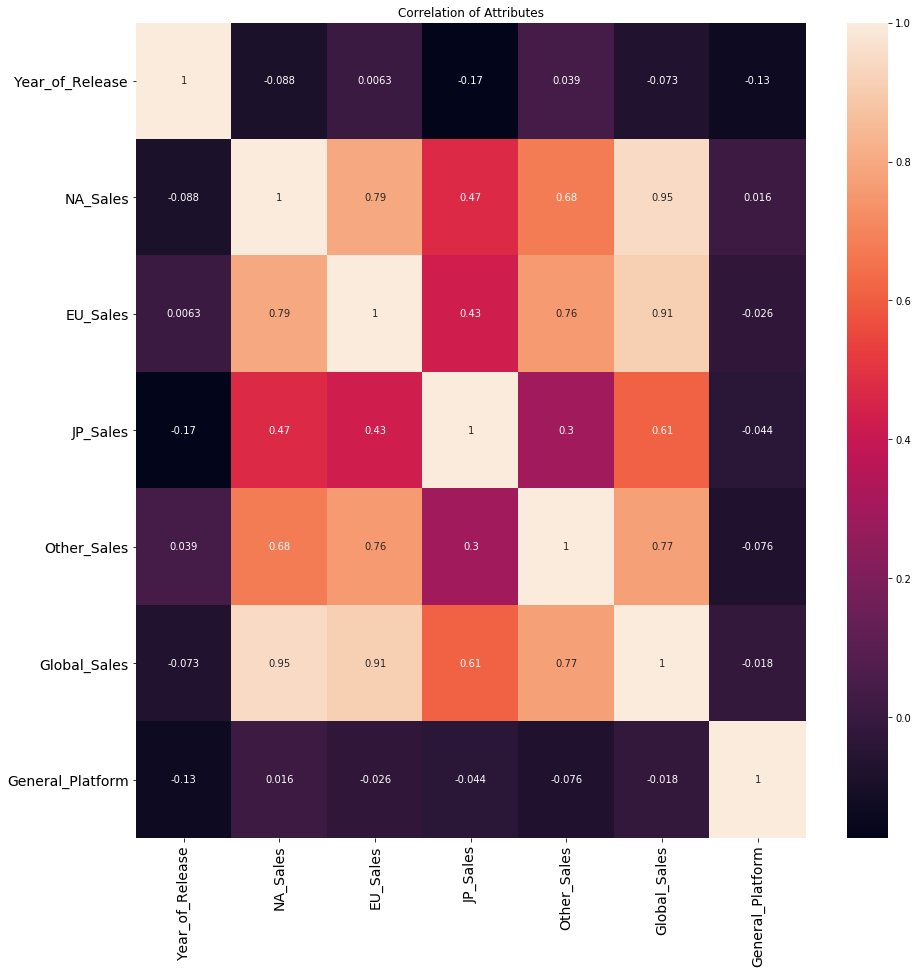

In [64]:
sb.heatmap(train_std.corr(), annot=True).set_title("Correlation of Attributes")
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

-check amounts of video games produced vs time
-consider when data should start
-fix categorical data so can be put in heatmap
-focus is NA sales